In [4]:
!pip install librosa

In [5]:
!pip install kaggle

In [6]:
import os

os.environ['KAGGLE_USERNAME'] = 'Vamshikrishna Bandaru'
os.environ['KAGGLE_KEY'] = 'KGAT_ed8ebd8e72b53273522dd849542709df'

In [7]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
replace Data/features_30_sec.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
DATASET_PATH = "Data/genres_original"
SAMPLE_RATE = 22050
MFCC_NUM = 40

In [15]:
os.listdir(DATASET_PATH)

['reggae',
 'classical',
 'disco',
 'pop',
 'rock',
 'country',
 'metal',
 'blues',
 'jazz',
 'hiphop']

In [16]:
features = []
labels = []

for genre in os.listdir(DATASET_PATH):
    genre_path = os.path.join(DATASET_PATH, genre)

    for file in os.listdir(genre_path):
        file_path = os.path.join(genre_path, file)

        try:
            audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=MFCC_NUM)
            mfcc = np.mean(mfcc.T, axis=0)

            features.append(mfcc)
            labels.append(genre)

        except:
            pass

features = np.array(features)
labels = np.array(labels)

print("Features Shape:", features.shape)

/tmp/ipython-input-4094120784.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Features Shape: (999, 40)


In [17]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

labels_categorical = to_categorical(labels_encoded)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels_categorical,
    test_size=0.2,
    random_state=42
)

In [19]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(40,)))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,298 (204.29 KB)

 Trainable params: 52,298 (204.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1338 - loss: 10.1162 - val_accuracy: 0.2900 - val_loss: 2.1364
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1719 - loss: 3.6787 - val_accuracy: 0.2900 - val_loss: 1.9692
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2431 - loss: 2.6895 - val_accuracy: 0.2950 - val_loss: 1.9095
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2772 - loss: 2.3183 - val_accuracy: 0.2950 - val_loss: 1.9004
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2481 - loss: 2.1995 - val_accuracy: 0.3100 - val_loss: 1.8413
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3249 - loss: 1.9891 - val_accuracy: 0.3000 - val_loss: 1.7967
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3340 - loss: 1.9048 - val_accuracy: 0.3550 - val_loss: 1.7917
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3116 - loss: 1.9258 - val_accuracy: 0.3200 - val_l

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6071 - loss: 1.1203
Test Accuracy: 0.574999988079071


In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(confusion_matrix(y_true, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[11  0  3  0  0  4  1  0  0  1]
 [ 0 10  0  0  0  2  0  0  0  0]
 [ 3  1 12  0  0  7  0  1  1  3]
 [ 2  0  0  5  2  0  2  2  2  9]
 [ 0  0  1  0  8  2  2  0  5  2]
 [ 0  1  2  0  0 16  0  0  2  0]
 [ 2  0  0  0  1  0 14  0  0  0]
 [ 0  1  1  0  1  0  0 16  1  2]
 [ 1  0  0  1  2  1  0  0 16  0]
 [ 0  0  3  1  0  1  0  0  3  7]]


In [23]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.77      0.83      0.80        12
           2       0.55      0.43      0.48        28
           3       0.71      0.21      0.32        24
           4       0.57      0.40      0.47        20
           5       0.48      0.76      0.59        21
           6       0.74      0.82      0.78        17
           7       0.84      0.73      0.78        22
           8       0.53      0.76      0.63        21
           9       0.29      0.47      0.36        15

    accuracy                           0.57       200
   macro avg       0.61      0.60      0.58       200
weighted avg       0.61      0.57      0.56       200



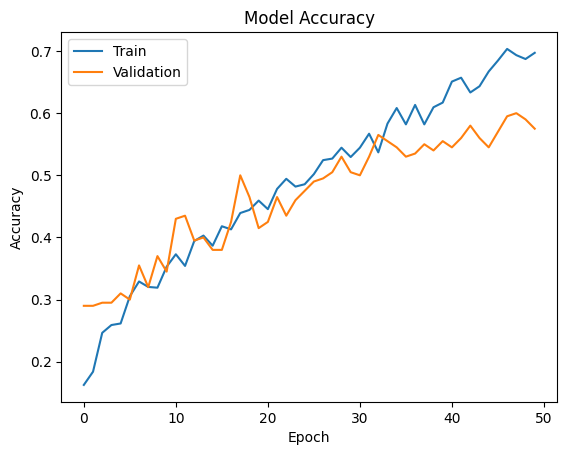

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [25]:
model.save("music_genre_model.h5")

In [26]:
def predict_genre(file_path):
    audio, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfcc = np.mean(mfcc.T, axis=0)
    mfcc = mfcc.reshape(1, -1)

    prediction = model.predict(mfcc)
    predicted_index = np.argmax(prediction)

    return encoder.inverse_transform([predicted_index])[0]

In [27]:
test_file = "Data/genres_original/rock/rock.00000.wav"
print("Predicted Genre:", predict_genre(test_file))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Genre: rock


In [28]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

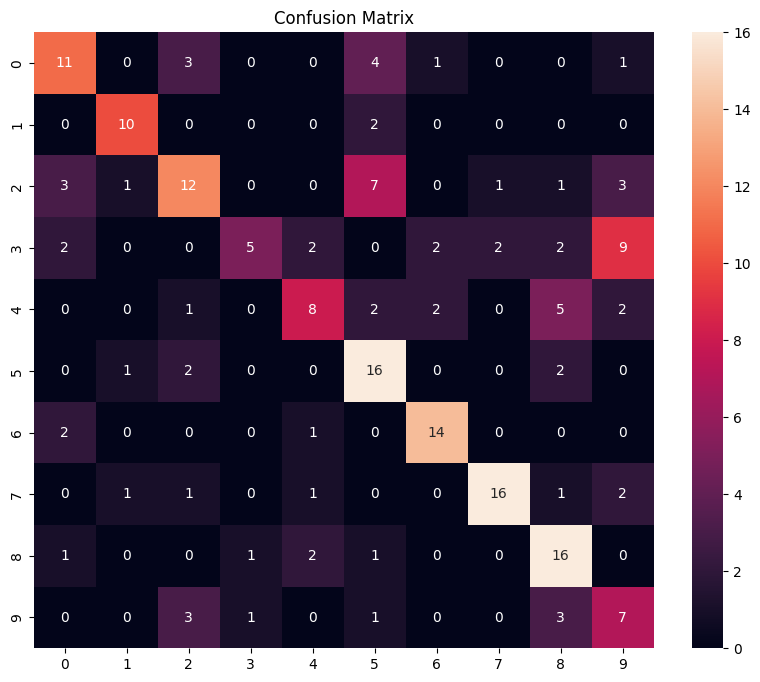

In [29]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred_classes),
            annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()